- Read in the dataset.
- Drop 'PID' & 'Order' values as they do not count towards valuations.
- Examine the dataset.
- Set target_var='SalePrice'

In [41]:
'''
"CodeBlock 1"

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''
! pwd 
! ls -al
import pandas as pd
import numpy as np

#https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# drop ORDER & PID
df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID','Order'], axis=1, inplace=True)
df_orig.head()
target_var='SalePrice'
rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
df_orig.head()



/Users/r.cunningham/Desktop/PgCert/university_assignment_2025
total 11288
drwxr-xr-x@ 17 r.cunningham  staff      544 Apr  7 13:41 .
drwxr-xr-x@  8 r.cunningham  staff      256 Apr  7 13:41 ..
-rw-r--r--@  1 r.cunningham  staff     6148 Apr  6 11:56 .DS_Store
drwxr-xr-x@ 14 r.cunningham  staff      448 Apr  1 18:10 .git
-rw-rw-r--   1 r.cunningham  staff   963738 Mar 30 20:13 AmesHousing.csv
drwxr-xr-x@  5 r.cunningham  staff      160 Apr  5 16:12 Outliers
-rw-r--r--   1 r.cunningham  staff      136 Apr  6 21:55 README.md
-rw-r--r--   1 r.cunningham  staff    73384 Apr  5 15:32 Sat_aft.ipynb
drwxr-xr-x@  8 r.cunningham  staff      256 Apr  1 18:09 archive
-rw-r--r--   1 r.cunningham  staff  1465693 Apr  7 13:41 assignment_gold.ipynb
-rw-r--r--   1 r.cunningham  staff  1026563 Apr  5 18:49 assignment_with_k2.ipynb
-rw-r--r--   1 r.cunningham  staff   973975 Apr  6 20:04 assignment_with_k2_sat_evening.ipynb
-rw-r--r--   1 r.cunningham  staff   849487 Apr  6 22:26 assignment_with_k2_sun_e

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Get a list of categorical and numeric columns to aid later encoding.

- train_df.dtypes → Returns the data type of each column.
- train_df.dtypes != "object" → Filters numerical columns (int64, float64).
- train_df.dtypes == "object" → Filters categorical columns (object data type).
- .tolist() → Converts the column index to a list for easier use.

In [43]:
'''
"CodeBlock Get Numerical and Categorical"
Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''

numerical_df = df_orig.dtypes[df_orig.dtypes != "object"].index
numerical_column_names=numerical_df.to_list()
categorical_df = df_orig.dtypes[df_orig.dtypes == "object"].index
categorical_column_names=categorical_df.to_list()
print('\nNumerical Columns:')
print(numerical_column_names)
print('\nCategorical Columns:')
print(categorical_column_names)


Numerical Columns:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Categorical Columns:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating 

Correlation heatmap of numeric features

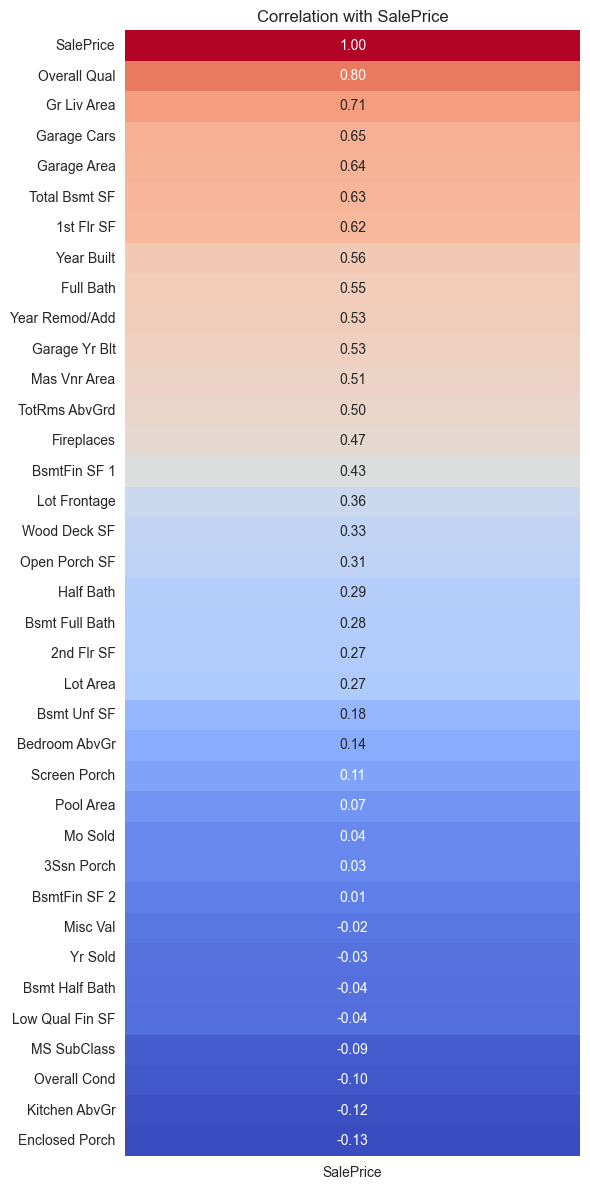

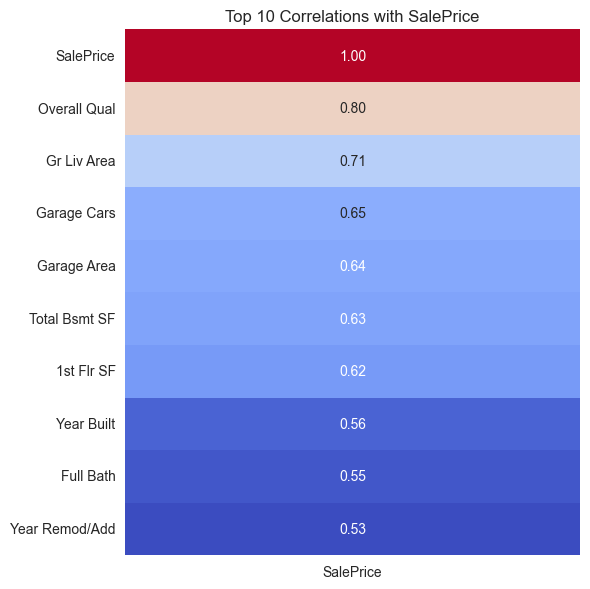

            Feature  Correlation
0    Enclosed Porch    -0.128787
1     Kitchen AbvGr    -0.119814
2      Overall Cond    -0.101697
3       MS SubClass    -0.085092
4   Low Qual Fin SF    -0.037660
5    Bsmt Half Bath    -0.035835
6           Yr Sold    -0.030569
7          Misc Val    -0.015691
8      BsmtFin SF 2     0.005891
9        3Ssn Porch     0.032225
10          Mo Sold     0.035259
11        Pool Area     0.068403
12     Screen Porch     0.112151
13    Bedroom AbvGr     0.143913
14      Bsmt Unf SF     0.182855
Enclosed Porch
Kitchen AbvGr
Overall Cond
MS SubClass
Low Qual Fin SF
Bsmt Half Bath
Yr Sold
Misc Val
BsmtFin SF 2
3Ssn Porch
Mo Sold
Pool Area
Screen Porch
Bedroom AbvGr
Bsmt Unf SF


In [44]:
'''
"CodeBlock HEATMAP"
Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'(str)
would_drop_list=List of features with low correlation to target_var
'''


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute correlation matrix
corr_matrix = df_orig.corr(numeric_only=True)

# Step 2: Select and sort by correlation with SalePrice
saleprice_corr = corr_matrix[["SalePrice"]].sort_values(by="SalePrice", ascending=False)

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(saleprice_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Correlation with SalePrice")
plt.tight_layout()
plt.show()
top_corr = saleprice_corr.head(10)
plt.figure(figsize=(6, 6))
sns.heatmap(top_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Top 10 Correlations with SalePrice")
plt.tight_layout()
plt.show()
# Compute correlation matrix (numeric features only)
corr_matrix = df_orig.corr(numeric_only=True)

# Extract correlation with SalePrice
saleprice_corr = corr_matrix["SalePrice"]

# Get features with weak correlation (absolute value < 0.2)
low_corr_features = saleprice_corr[abs(saleprice_corr) < 0.2].sort_values()

# Display as a DataFrame
low_corr_features_df = low_corr_features.reset_index()
low_corr_features_df.columns = ["Feature", "Correlation"]
print(low_corr_features_df)

# Create list of potential features to drop
would_drop_list= low_corr_features.drop("SalePrice", errors="ignore").index.tolist()
for item in would_drop_list:
    print(item)


Here we see the SalePrice descriptive statistics. 

The mean is greater than the median which can indicate a positive or 
right skewededness. We can confirm this by visualizing the data.

We will look for outliers

False
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


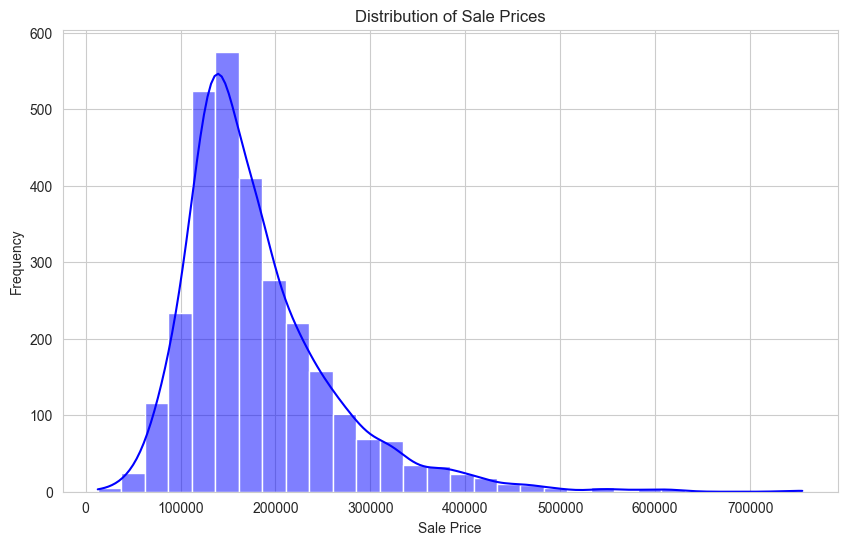

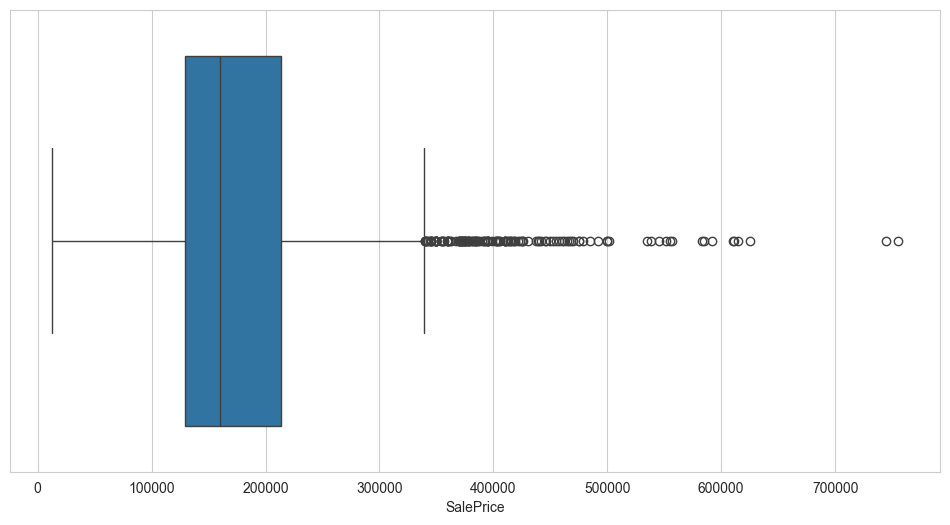

Number of outliers: 137


In [45]:
'''

"CodeBlock  SHOW_OUTLIERS"

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
'''

target_var='SalePrice'
transform=False
print(df_orig['SalePrice'].isnull().any())
print(df_orig['SalePrice'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_orig['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


def show_outliers(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["SalePrice"])
    plt.show()


    Q1 = df["SalePrice"].quantile(0.25)
    Q3 = df["SalePrice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["SalePrice"] < lower_bound) | (df["SalePrice"] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")
show_outliers(df_orig)

See how to handle outliers

In [46]:
'''
"CodeBlock SHOW_OUTLIERS2"  

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
Q1 = df_orig["SalePrice"].quantile(0.25)
Q3 = df_orig["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

# Filter outliers
outliers = df_orig[df_orig["SalePrice"] > upper_whisker]

rows, cols = df_orig.shape
print(f"Total Rows: {rows}, Columns: {cols}")
print(outliers["Neighborhood"].value_counts())

print(outliers["Overall Qual"].value_counts())

Total Rows: 2930, Columns: 80
Neighborhood
NridgHt    62
StoneBr    22
NoRidge    21
Timber      8
Somerst     8
CollgCr     5
Crawfor     5
Veenker     2
NAmes       1
Gilbert     1
OldTown     1
Edwards     1
Name: count, dtype: int64
Overall Qual
9     60
8     48
10    25
7      3
6      1
Name: count, dtype: int64


See Average sale price per area

/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_37409/3220213978.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette="viridis")


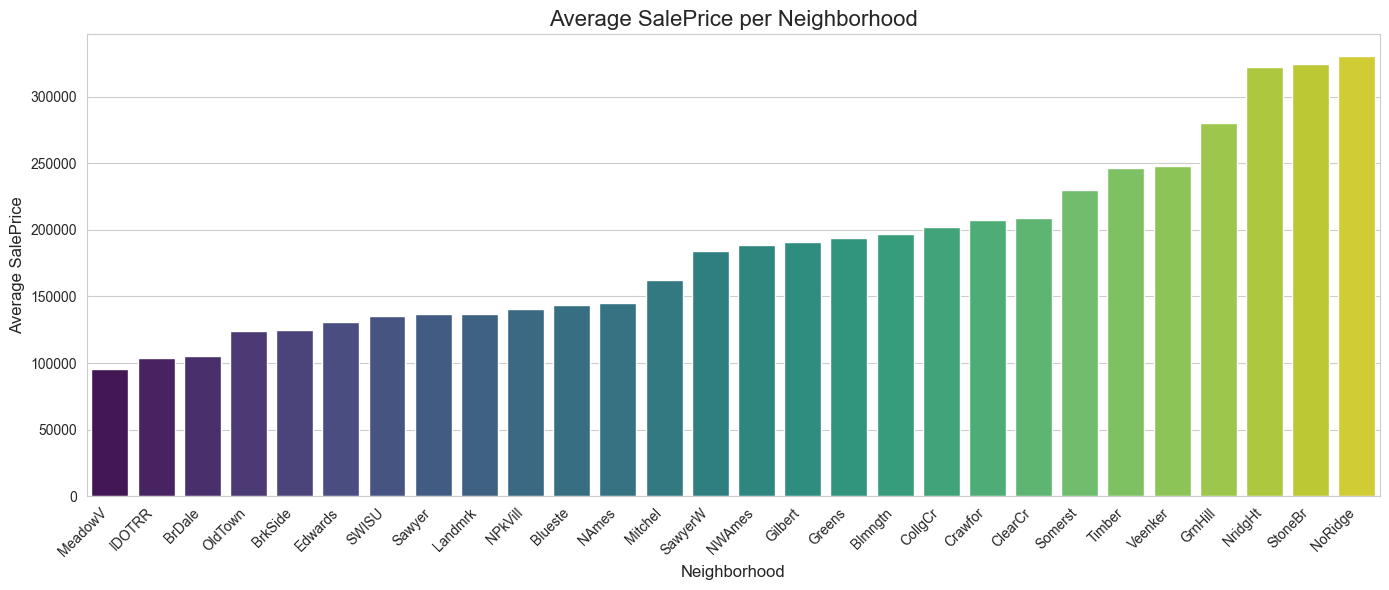

   Neighborhood  Average_SalePrice
0       NoRidge      330319.126761
1       StoneBr      324229.196078
2       NridgHt      322018.265060
3       GrnHill      280000.000000
4       Veenker      248314.583333
5        Timber      246599.541667
6       Somerst      229707.324176
7       ClearCr      208662.090909
8       Crawfor      207550.834951
9       CollgCr      201803.434457
10      Blmngtn      196661.678571
11       Greens      193531.250000
12      Gilbert      190646.575758
13       NWAmes      188406.908397
14      SawyerW      184070.184000
15      Mitchel      162226.631579
16        NAmes      145097.349887
17      Blueste      143590.000000
18      NPkVill      140710.869565
19      Landmrk      137000.000000
20       Sawyer      136751.152318
21        SWISU      135071.937500
22      Edwards      130843.381443
23      BrkSide      124756.250000
24      OldTown      123991.891213
25       BrDale      105608.333333
26       IDOTRR      103752.903226
27      MeadowV     

In [47]:
'''
"CodeBlock AVG_SL_PRICE_PER_AREA"  

Original dataframe=df_orig
Data not modified in this codeblock
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
df=df_orig.copy()
# Group by Neighborhood and calculate mean SalePrice
avg_price_by_neighborhood = df.groupby("Neighborhood")["SalePrice"].mean().sort_values()

# Create a barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_price_by_neighborhood.index, y=avg_price_by_neighborhood.values, palette="viridis")

# Customize the chart
plt.title("Average SalePrice per Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average SalePrice", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Group by Neighborhood and compute the mean SalePrice
avg_price_by_neighborhood = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

# Convert to DataFrame (optional for display)
avg_price_table = avg_price_by_neighborhood.reset_index()
avg_price_table.columns = ["Neighborhood", "Average_SalePrice"]

# Show the table
print(avg_price_table)

Handle missing values

In [49]:
'''
"CodeBlock HANDLE_MISSING"  

df=df_orig.copy()
Created df_cleaned
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''
# Identify missing values
df=df=df_orig.copy()
missing_values = df.isnull().sum()
count_missing=len(np.where(df.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a DataFrame with missing count and percentage
missing_values_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': (missing_values.values / len(df_orig)) * 100
})

# Sort by highest missing percentage
missing_values_df = missing_values_df.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_values_df)

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
def do_drop(df):
    threshold = 0.80  # 80%
    cols_to_drop = missing_values_df[missing_values_df['Missing Percentage'] > (threshold * 100)]['Column'].tolist()
    print(f"Columns to drop: {cols_to_drop}")
    df_cleaned = df.drop(columns=cols_to_drop)
    return df_cleaned

def do_impute(df):
    # Impute missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numeric columns
            df[col].fillna(df[col].mean(), inplace=True)
    return df

drop=False

if drop:
    df=do_drop(df)
df_cleaned=do_impute(df)


# Identify missing values
missing_values = df_cleaned.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
rows, cols = df_cleaned.shape
print(f"Rows: {rows}, Columns: {cols}")

# RETURN df_cleaned



There are 15749 empty values in the dataframe.
            Column  Missing Count  Missing Percentage
24         Pool QC           2917           99.556314
26    Misc Feature           2824           96.382253
1            Alley           2732           93.242321
25           Fence           2358           80.477816
2     Mas Vnr Type           1775           60.580205
16    Fireplace Qu           1422           48.532423
0     Lot Frontage            490           16.723549
23     Garage Cond            159            5.426621
22     Garage Qual            159            5.426621
19   Garage Finish            159            5.426621
18   Garage Yr Blt            159            5.426621
17     Garage Type            157            5.358362
6    Bsmt Exposure             83            2.832765
9   BsmtFin Type 2             81            2.764505
5        Bsmt Cond             80            2.730375
4        Bsmt Qual             80            2.730375
7   BsmtFin Type 1             80  

/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_37409/2503998878.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_37409/2503998878.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Add synthetic data

In [2]:
'''
"CodeBlock SYNTH"  

df=df_cleaned.copy()
Created df_with_synthetics
Vars:
target_var='SalePrice'
outliers=outlier properties, dataframe
'''

df=df_cleaned.copy()
df["is_synthetic"] = 0

# Get numeric median values to simulate a typical home
baseline = df.select_dtypes(include="number").median()

# Create two synthetic rows
synthetic_low = baseline.copy()
synthetic_high = baseline.copy()
# print(synthetic_low)

# Find neighborhoods with lowest and highest average prices:
neigh_prices = df.groupby("Neighborhood")["SalePrice"].mean()
lowest_neigh = neigh_prices.idxmin()
highest_neigh = neigh_prices.idxmax()
# print(lowest_neigh)
# print(highest_neigh)
synthetic_low["Neighborhood"] = lowest_neigh
synthetic_high["Neighborhood"] = highest_neigh

# Optional: Add default values for categorical features
for col in df.select_dtypes(include="object").columns:
    if col != "Neighborhood":
        mode = df[col].mode()[0]
        synthetic_low[col] = mode
        synthetic_high[col] = mode

print(synthetic_low)
#  Combine into a DataFrame
synthetic_df = pd.DataFrame([synthetic_low, synthetic_high])
synthetic_df["is_synthetic"] = 1  # Flag them
synthetic_df.head()

df_with_synthetics = pd.concat([df, synthetic_df], ignore_index=True)
synthetic_df.head()
df_with_synthetics.is_synthetic

df_with_synthetics.shape
df_with_synthetics.info()
df_with_synthetics.describe()
df_with_synthetics.isnull().sum()
df_with_synthetics.head()
df_with_synthetics["is_synthetic"].value_counts() 

# synthetic_df.Neighborhood
# You now have:

#     Two "test case" homes, one in each extreme neighborhood

#     All features identical except Neighborhood

NameError: name 'df_cleaned' is not defined

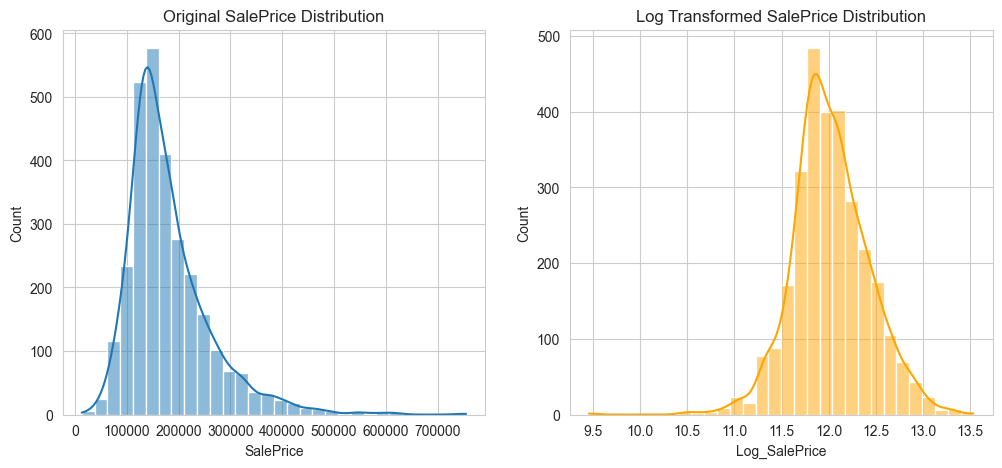

Target var = Log_SalePrice


In [51]:
'''
"CodeBlock TRANSFORM SALES"  

Using df=df_with_synthetics.copy()
Created df_log_transformed - with the SalePrice log transformed to Log_SalePrice
Vars:
target_var='SalePrice', string
outliers=outlier properties, dataframe
log_Sale_price="Log_SalePrice",string
'''
df=df_with_synthetics.copy()
transform=True
def transform_sale_price(df,new_target_var,orig_target_var):

    # Apply log transformation
    log_Sale_price="Log_SalePrice"
    df[new_target_var] = np.log1p(df[orig_target_var])

    # Compare distributions before and after transformation
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original SalePrice Distribution
    sns.histplot(df[orig_target_var], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Original SalePrice Distribution")

    # Log Transformed SalePrice Distribution
    sns.histplot(df[new_target_var], bins=30, kde=True, ax=axes[1], color="orange")
    axes[1].set_title("Log Transformed SalePrice Distribution")

    plt.show()

    return df

if transform:
    orig_target_var='SalePrice'
    new_target_var='Log_SalePrice'
    df_log_transformed=transform_sale_price(df,new_target_var,orig_target_var)
    target_var=new_target_var

print(f'Target var = {target_var}')


In [12]:
project_datasets={}

ONE Hot ENCODE

In [ ]:
'''
"CodeBlock ONE_HOT_ENCODE_ALL_CATEGORICAL_VARIABLES"  

Using df=df_log_transformed.copy()
Created df_log_transformed - with the SalePrice log transformed to Log_SalePrice
Vars:
target_var='SalePrice', string
outliers=outlier properties, dataframe
log_Sale_price="Log_SalePrice",string
'''

from sklearn.preprocessing import OneHotEncoder

df=df_log_transformed.copy()
df_1_hot_encoded = pd.get_dummies(df,dtype=float)
# df_1_hot_encoded = pd.get_dummies(df)
df_1_hot_encoded
name='Nhood 1 Hot Encoded'
project_datasets[name]=df_1_hot_encoded
# returns df_1_hot_encoded


Neighborhood Category encoded

In [61]:
df=df_log_transformed.copy()

# Encode neighborhood as numeric
df['Neighborhood_Code'] = df['Neighborhood'].astype('category').cat.codes
df.drop(columns=['Neighborhood'], inplace=True)
df_nhood_cat_encoded = pd.get_dummies(df, dtype=float)
# df_nhood_cat_encoded = pd.get_dummies(df)
df_nhood_cat_encoded
name='Nhood Cat Encoded'
project_datasets['Nhood Cat Encoded']=df_nhood_cat_encoded
# returns df_nhood_cat_encoded

In [63]:
df=df_log_transformed.copy()
import category_encoders as ce
# # Step 1: Create the mapping from each category to mean SalePrice
# neighborhood_means = df.groupby("Neighborhood")["SalePrice"].mean().to_dict()

# # Step 2: Map it to a new column
# df["Neighborhood_TargetEnc"] = df["Neighborhood"].map(neighborhood_means)
# df["Neighborhood_TargetEnc"]

from sklearn.preprocessing import OneHotEncoder


# Identify categorical features
categorical_cols = categorical_column_names.copy()
categorical_cols.remove("Neighborhood")
print("Categorical Columns:", categorical_cols)

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit-transform and convert to dataframe
encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with numerical features and drop original categorical columns
df_1_encoded_with_nhood_intact= pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_1_encoded_with_nhood_intact.head()
rows, cols = df_1_encoded_with_nhood_intact.shape
print(f"Rows: {rows}, Columns: {cols}")
df_1_encoded_with_nhood_intact.head()
name='Nhood intact but rest cat dummies'
project_datasets[name]=df_1_encoded_with_nhood_intact

Categorical Columns: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
Rows: 2932, Columns: 237


✅ Understanding the Setup:

In target encoding, only the feature data (X_train and X_test) is encoded.
The target (y_train, y_test) is never transformed — it’s used only to teach the encoder during training.

🧠 Why y_test Is Not Encoded:

    The target (y_test) is what you’re trying to predict

    You never encode or transform it — you just compare predictions to it after the model runs

from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# 2. Target encode X (not y!)
encoder = TargetEncoder(cols=["Neighborhood"])
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# 3. Fit a model
model = RandomForestRegressor()
model.fit(X_train_enc, y_train)

# 4. Predict and compare to raw y_test
y_pred = model.predict(X_test_enc)

# 5. Evaluate
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: ${mae:,.2f}")
TL;DR
Element	Encoded?	Why?
X_train	✅ Yes	Input features for training
X_test	✅ Yes	Input features for prediction
y_train	❌ No	Used as target to learn encoding
y_test	❌ No	Ground truth to evaluate model


Target Variable:
 Log_SalePrice


Nhood 1 Hot Encoded
(2930, 306) (2, 306)
Nhood 1 Hot Encoded
Training and evaluating Linear Regression...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0        139717.12
2931      160000.0        165696.24
END SYNTH
Nhood 1 Hot Encoded
Training and evaluating Random Forest...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0         166081.2
2931      160000.0         166081.2
END SYNTH
           Feature  Importance
3     Overall Qual    0.580941
15     Gr Liv Area    0.089585
26     Garage Area    0.041731
25     Garage Cars    0.039549
11   Total Bsmt SF    0.031190
12      1st Flr SF    0.027581
8     BsmtFin SF 1    0.016528
5       Year Built    0.014364
2         Lot Area    0.013388
6   Year Remod/Add    0.010148
4     Overall Cond    0.007068
10     Bsmt Unf SF    0.005457
42    MS Zoning_RM    0.005414
13      2nd Flr SF    0.005366
18       Full Bath    0.004784


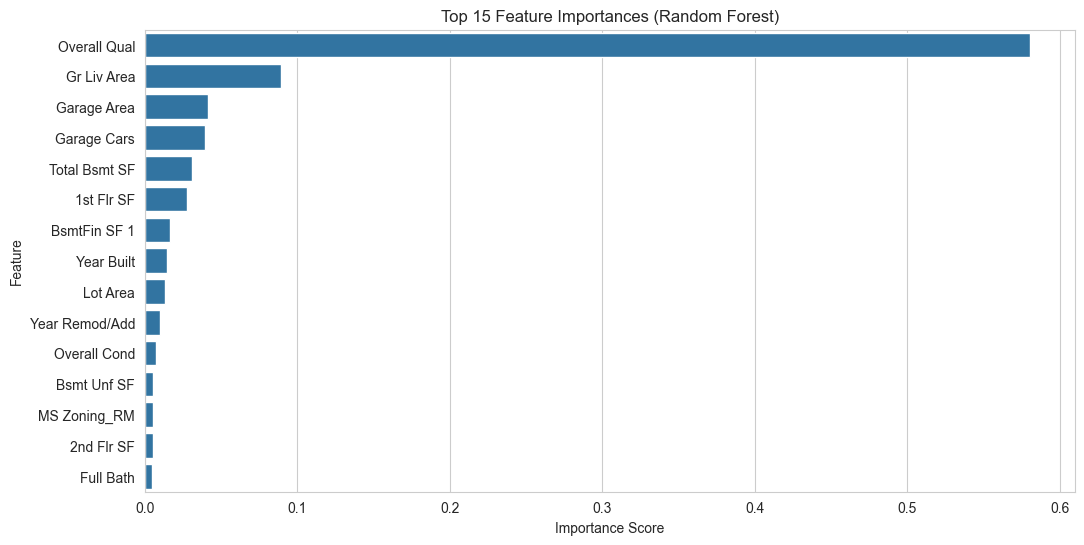

Nhood intact but rest cat dummies
(2930, 237) (2, 237)
TARGET ENCODING
Nhood intact but rest cat dummies
Training and evaluating Linear Regression...
Nhood intact but rest cat dummies
Training and evaluating Linear Regression...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0        154174.44
2931      160000.0        171915.42
END SYNTH
Nhood intact but rest cat dummies
Training and evaluating Random Forest...
Nhood intact but rest cat dummies
Training and evaluating Random Forest...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0        150909.35
2931      160000.0        177350.73
END SYNTH
            Feature  Importance
4      Overall Qual    0.564438
16      Gr Liv Area    0.090476
3      Neighborhood    0.052398
27      Garage Area    0.041047
26      Garage Cars    0.032799
12    Total Bsmt SF    0.028546
13       1st Flr SF    0.026357
9      BsmtFin SF 1    0.016626
2          Lot Area    0.014818
6        Year Built    0.010219
7    Year

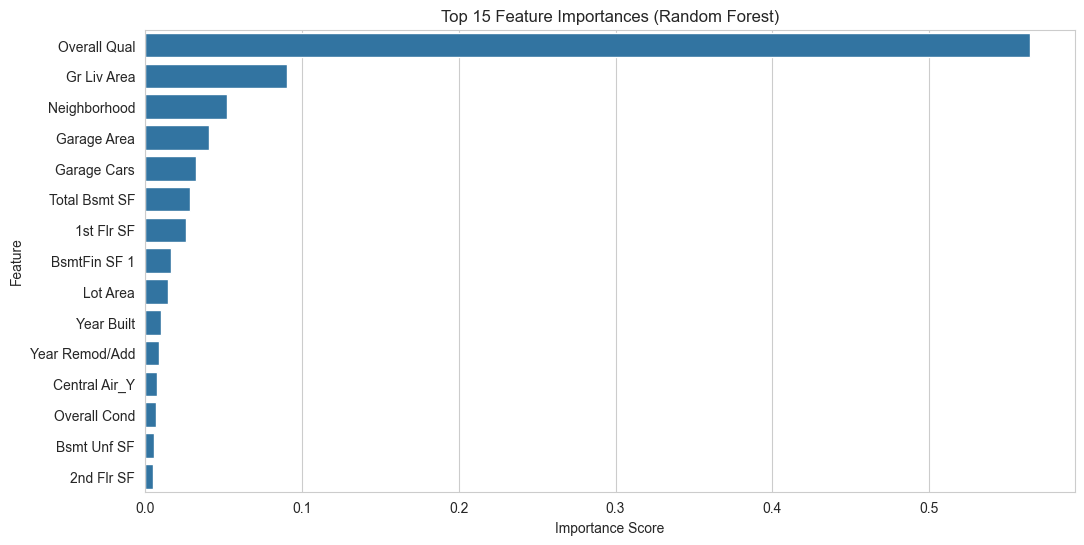

Nhood Cat Encoded
(2930, 279) (2, 279)
Nhood Cat Encoded
Training and evaluating Linear Regression...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0        160656.14
2931      160000.0        160385.49
END SYNTH
Nhood Cat Encoded
Training and evaluating Random Forest...
START SYNTH
      Actual Price  Predicted Price
2930      160000.0        166152.55
2931      160000.0        166356.81
END SYNTH
           Feature  Importance
3     Overall Qual    0.580851
15     Gr Liv Area    0.089563
26     Garage Area    0.041440
25     Garage Cars    0.039390
11   Total Bsmt SF    0.031029
12      1st Flr SF    0.027607
8     BsmtFin SF 1    0.016444
5       Year Built    0.014637
2         Lot Area    0.013610
6   Year Remod/Add    0.010481
4     Overall Cond    0.007138
10     Bsmt Unf SF    0.005674
43    MS Zoning_RM    0.005509
13      2nd Flr SF    0.005202
18       Full Bath    0.004788


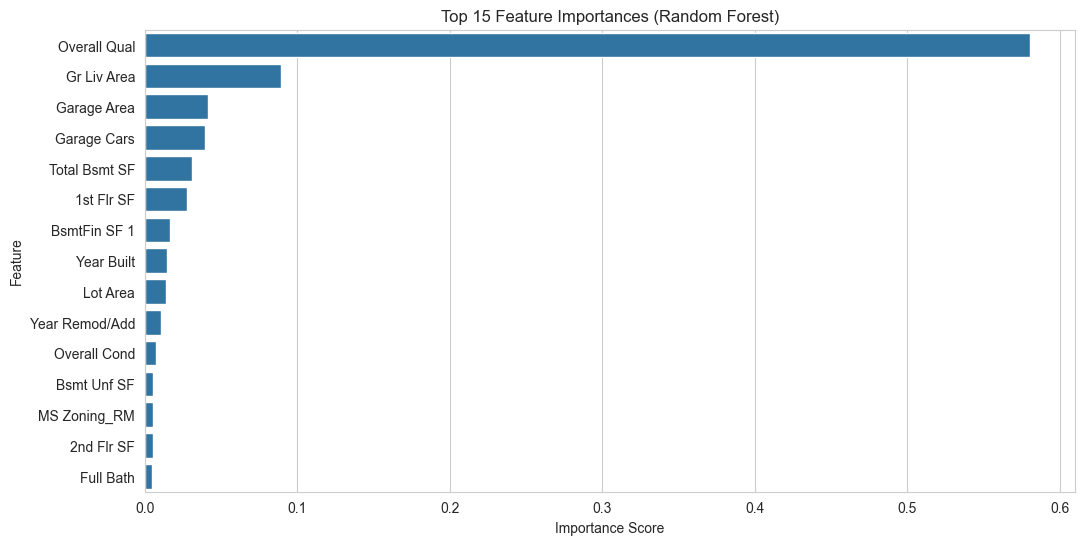

+----+-----------------------------------+-------------------+---------+---------+----------+------------+-------------+
|    | Encode                            | Model             |     MAE |    RMSE |       R² |   LowNPred |   HignNPred |
|----+-----------------------------------+-------------------+---------+---------+----------+------------+-------------|
|  0 | Nhood 1 Hot Encoded               | Linear Regression | 14626   | 38435.1 | 0.815747 |     139717 |      165696 |
|  1 | Nhood 1 Hot Encoded               | Random Forest     | 16129.3 | 27033.4 | 0.90885  |     166081 |      166081 |
|  2 | Nhood intact but rest cat dummies | Linear Regression | 15162.7 | 39809.6 | 0.802333 |     154174 |      171915 |
|  3 | Nhood intact but rest cat dummies | Random Forest     | 15695.1 | 26112.6 | 0.914953 |     150909 |      177351 |
|  4 | Nhood Cat Encoded                 | Linear Regression | 15260.2 | 43695   | 0.761866 |     160656 |      160385 |
|  5 | Nhood Cat Encoded        

In [64]:
# Import necessary libraries
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Define target variable
target = target_var
print("\nTarget Variable:\n", target)
print("\n")

# Define models
models = [
    (LinearRegression(), "Linear Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
]


columns_to_drop=["SalePrice", "Log_SalePrice", "is_synthetic"]

results = []
trained_models = []
# Function to train and evaluate models

def show_feature_importance(rf_model):
    feature_importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Display feature importance rankings
    print(feature_importances.head(15))

    # Visualizing Feature Importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15))
    plt.title("Top 15 Feature Importances (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

def run_shap(model, X_train,X_test):
    pass
    explainer = shap.Explainer(model, X_train)
    # Compute SHAP values for the test set
    shap_values = explainer(X_test)
    # shap.plots.bar(shap_values.abs.max(0), max_display=20)
    sample_ind = 20
    shap.plots.waterfall(shap_values[sample_ind+123])
    shap.plots.bar(shap.Explanation(shap_values[1], feature_names=X_test.columns))
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name,encode_type,X_synth,y_synth):

    print(f"{encode_type}")
    print(f"Training and evaluating {model_name}...")

    model.fit(X_train, y_train)
    trained_models.append(model)

    y_pred_log = model.predict(X_test)      # predictions are in log scale
    y_pred = np.expm1(y_pred_log)           # log1p was used, so use expm1 here

    y_test_actual = np.expm1(y_test)               # convert actual values back too

    results = pd.DataFrame({
        "Actual Price": y_test_actual,
        "Predicted Price": y_pred
    })

    # Optional: round for readability
    results = results.round(2)

    # # View first few rows
    # print(results.head())
# Compute metrics
    mae = mean_absolute_error(y_test_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))  # <--- FIXED!
    r2 = r2_score(y_test_actual, y_pred)

    # Print results
    # print(f"MAE: ${mae:,.2f}")
    # print(f"RMSE: ${rmse:,.2f}")
    # print(f"R² Score: {r2:.3f}")

    p1=''
    p2=''


    def do_synth():
        print('START SYNTH')
        y_pred_log = model.predict(X_synth) 
        y_pred = np.expm1(y_pred_log) 
        y_test_actual = np.expm1(y_synth)               # convert actual values back too

        results = pd.DataFrame({
            "Actual Price": y_test_actual,
            "Predicted Price": y_pred
        })
        

        # Optional: round for readability
        results = results.round(2)
        p1=results.iloc[0]["Predicted Price"]
        p2=results.iloc[1]["Predicted Price"]

        # View first few rows
        print(results.head())
        print('END SYNTH')
        return p1,p2
    p1,p2=do_synth()

    if model_name == 'Random Forest':
        show_feature_importance(model)
    # if model_name == 'Linear Regression':
    #     run_shap(model, X_train,X_test)

    return {"Encode": encode_type,"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2,"LowNPred": p1,"HignNPred": p2}


for k,v in project_datasets.items():
    df=v.copy()
    df_real = df[df["is_synthetic"] == 0]
    df_synth = df[df["is_synthetic"] == 1]
    print(k)
    print(df_real.shape, df_synth.shape)

    # Define features (X) and target variable (y)
    X_real = df_real.drop(columns=columns_to_drop)
    y_real = df_real[target]  

    X_synth = df_synth.drop(columns=columns_to_drop)
    y_synth = df_synth[target] 

    # Split into training (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)


    if k == 'Nhood intact but rest cat dummies':
        # continue
        
        print('TARGET ENCODING')
        encoder = ce.TargetEncoder(cols=["Neighborhood"])
        # 2. Target encode X (not y!)
        X_train_enc = encoder.fit_transform(X_train, y_train)
        X_test_enc = encoder.transform(X_test)
        X_synth_enc = encoder.transform(X_synth)
        for model, name in models:
            print(f"{k}")
            print(f"Training and evaluating {name}...")
            results.append(train_and_evaluate(X_train_enc, X_test_enc, y_train, y_test, model, name,k,X_synth_enc,y_synth ))
        continue

    for model, name in models:
        results.append(train_and_evaluate(X_train, X_test, y_train, y_test, model, name,k,X_synth,y_synth))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
from tabulate import tabulate
print(tabulate(results_df.head(10), headers='keys', tablefmt='psql'))
    # for model in trained_models:
    #     print(model)


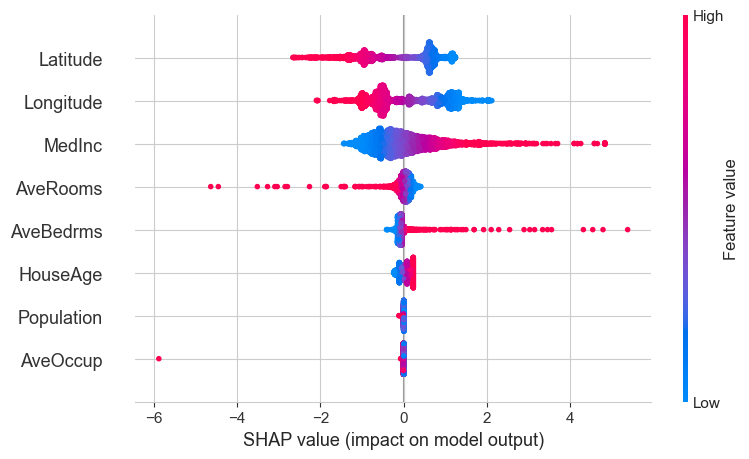

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap

# Load California housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)



MS SubClass               float64
Lot Frontage              float64
Lot Area                  float64
Overall Qual              float64
Overall Cond              float64
                           ...   
Sale Condition_AdjLand    float64
Sale Condition_Alloca     float64
Sale Condition_Family     float64
Sale Condition_Normal     float64
Sale Condition_Partial    float64
Length: 306, dtype: object


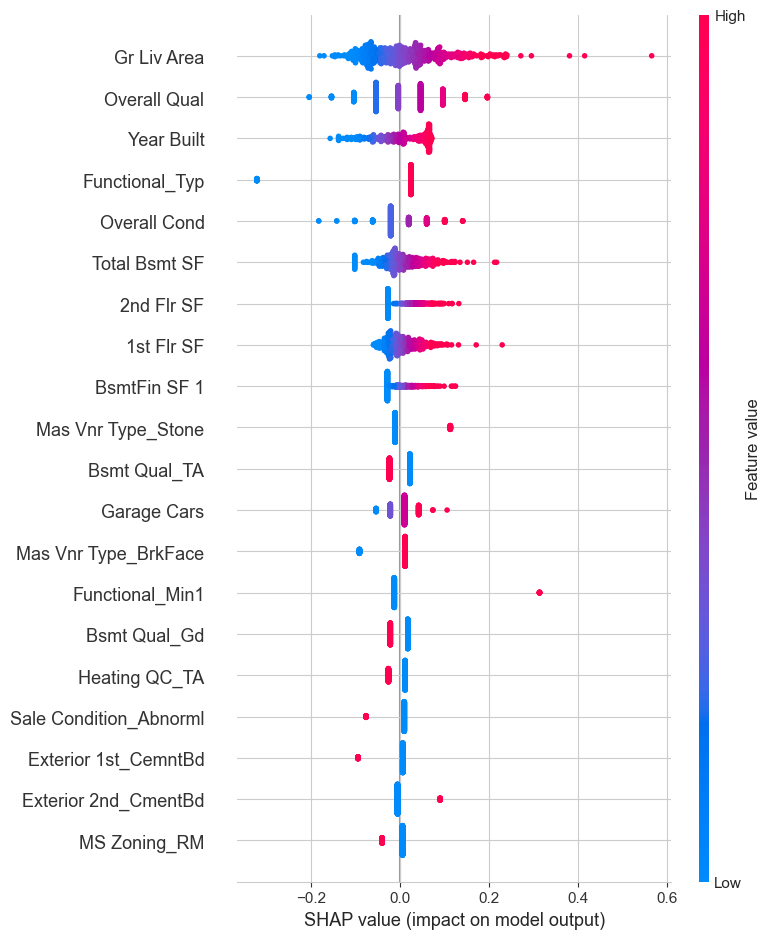

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=303)


In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
df =df_1_hot_encoded.copy()
df = df.astype(np.float64)
print(df.dtypes)
target='Log_SalePrice'
df_real = df[df["is_synthetic"] == 0]
df_synth = df[df["is_synthetic"] == 1]
columns_to_drop=["SalePrice", "Log_SalePrice", "is_synthetic"]

# Define features (X) and target variable (y)
X_real = df_real.drop(columns=columns_to_drop)
y_real = df_real[target]  

X_synth = df_synth.drop(columns=columns_to_drop)
y_synth = df_synth[target] 

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
# Load California housing dataset
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)
shap.summary_plot(shap_values)
# shap.plots.beeswarm(shap_values)
# shap.plots.beeswarm(shap_values[1], max_display=1)
# shap.plots.bar(shap.Explanation(shap_values[1], feature_names=X_test.columns))
# Visualize SHAP summary plot
# shap.summary_plot(shap.Explanation(shap_values[1], feature_names=X_test.columns))

print(X_test.columns)